In [62]:
import numpy as np
import random
import matplotlib.pyplot as plt
import networkx as nx

from pyqubo import Binary, Array
from pprint import pprint
from qat.lang.AQASM import Program, QRoutine, RZ, RX, CNOT, H, X
from qat.core import Observable, Term
from qat.qpus import get_default_qpu
from qat.plugins import ScipyMinimizePlugin

# Problema da Cobertura Exata (Exact Cover Problem)

Considere um conjunto $S = \{1, \ldots, n\}$ e uma coleção de subconjuntos.
$$ C = \{C_1, C_2, \ldots, C_n\} \subseteq 2^S$$
Uma cobertura de S com os conjuntos da coleção C é definida como o conjunto dos conjuntos $C_j, \ldots, C_k \in C$ tal que
$$\bigcup_i C_i = S$$
Para uma cobertura ser exata, os conjuntos que definem a cobertura devem ser disjuntos.

Finding Pentomino tilings and solving Sudoku are noteworthy examples of exact cover problems. The n queens problem is a slightly generalized exact cover problem.


In [63]:
#U = [1,2,3,4,5,6]
#V = [{1,2,3}, {4,5,6}, {1}, {2}, {3}, {4}, {5}, {6}]
U = [1,2,3,4,5,6,7]
V = [{1,7}, {1,4,7}, {1,4}, {4,5,7}, {3,5,6}, {2,3,6}, {2,7}]
A = 8
B = 1.5

## Hamiltoniano

Exact Cover Hamiltonian
$$ H_P = \sum^n_{\alpha=1} (1 - \sum_{i:\alpha\in V_i} x_i)^2$$

Min Exact Cover Hamiltonian
$$ H_P = A \sum^n_{\alpha=1} (1 - \sum_{i:\alpha\in V_i} x_i)^2 + B\sum_i x_i$$
$$A > nB$$

In [64]:
variables = Array.create('x', shape=len(V), vartype='BINARY')
print(variables)

Array([Binary('x[0]'), Binary('x[1]'), Binary('x[2]'), Binary('x[3]'), Binary('x[4]'), Binary('x[5]'), Binary('x[6]')])


In [65]:
HA = 0
for alpha in U:
    temp = sum(variables[i] for i, Vi in enumerate(V) if alpha in Vi)
    HA += (1-temp)**2
HA *= A

print(HA)

((((1.000000 + (-1.000000 * ((Binary('x[0]') + Binary('x[1]')) + Binary('x[2]')))) * (1.000000 + (-1.000000 * ((Binary('x[0]') + Binary('x[1]')) + Binary('x[2]'))))) + ((1.000000 + (-1.000000 * (Binary('x[5]') + Binary('x[6]')))) * (1.000000 + (-1.000000 * (Binary('x[5]') + Binary('x[6]'))))) + ((1.000000 + (-1.000000 * (Binary('x[4]') + Binary('x[5]')))) * (1.000000 + (-1.000000 * (Binary('x[4]') + Binary('x[5]'))))) + ((1.000000 + (-1.000000 * ((Binary('x[1]') + Binary('x[2]')) + Binary('x[3]')))) * (1.000000 + (-1.000000 * ((Binary('x[1]') + Binary('x[2]')) + Binary('x[3]'))))) + ((1.000000 + (-1.000000 * (Binary('x[3]') + Binary('x[4]')))) * (1.000000 + (-1.000000 * (Binary('x[3]') + Binary('x[4]'))))) + ((1.000000 + (-1.000000 * (Binary('x[4]') + Binary('x[5]')))) * (1.000000 + (-1.000000 * (Binary('x[4]') + Binary('x[5]'))))) + ((1.000000 + (-1.000000 * (((Binary('x[0]') + Binary('x[1]')) + Binary('x[3]')) + Binary('x[6]')))) * (1.000000 + (-1.000000 * (((Binary('x[0]') + Binary(

In [66]:
HB = B * sum(x for x in variables)

print(HB)

(1.500000 * ((((((Binary('x[0]') + Binary('x[1]')) + Binary('x[2]')) + Binary('x[3]')) + Binary('x[4]')) + Binary('x[5]')) + Binary('x[6]')))


In [67]:
Hamil = HA + HB
print(Hamil)

(((((1.000000 + (-1.000000 * ((Binary('x[0]') + Binary('x[1]')) + Binary('x[2]')))) * (1.000000 + (-1.000000 * ((Binary('x[0]') + Binary('x[1]')) + Binary('x[2]'))))) + ((1.000000 + (-1.000000 * (Binary('x[5]') + Binary('x[6]')))) * (1.000000 + (-1.000000 * (Binary('x[5]') + Binary('x[6]'))))) + ((1.000000 + (-1.000000 * (Binary('x[4]') + Binary('x[5]')))) * (1.000000 + (-1.000000 * (Binary('x[4]') + Binary('x[5]'))))) + ((1.000000 + (-1.000000 * ((Binary('x[1]') + Binary('x[2]')) + Binary('x[3]')))) * (1.000000 + (-1.000000 * ((Binary('x[1]') + Binary('x[2]')) + Binary('x[3]'))))) + ((1.000000 + (-1.000000 * (Binary('x[3]') + Binary('x[4]')))) * (1.000000 + (-1.000000 * (Binary('x[3]') + Binary('x[4]'))))) + ((1.000000 + (-1.000000 * (Binary('x[4]') + Binary('x[5]')))) * (1.000000 + (-1.000000 * (Binary('x[4]') + Binary('x[5]'))))) + ((1.000000 + (-1.000000 * (((Binary('x[0]') + Binary('x[1]')) + Binary('x[3]')) + Binary('x[6]')))) * (1.000000 + (-1.000000 * (((Binary('x[0]') + Binary

## Modelar como QUBO

$$-\sum_i^N h_ix_i - \sum_{i<j} J_{ij} x_ix_j $$

In [68]:
model = Hamil.compile()
qubo = model.to_qubo()
pprint(qubo)

({('x[0]', 'x[0]'): -14.5,
  ('x[0]', 'x[1]'): 32.0,
  ('x[0]', 'x[2]'): 16.0,
  ('x[0]', 'x[3]'): 16.0,
  ('x[0]', 'x[6]'): 16.0,
  ('x[1]', 'x[1]'): -22.5,
  ('x[1]', 'x[2]'): 32.0,
  ('x[1]', 'x[3]'): 32.0,
  ('x[1]', 'x[6]'): 16.0,
  ('x[2]', 'x[2]'): -14.5,
  ('x[2]', 'x[3]'): 16.0,
  ('x[3]', 'x[3]'): -22.5,
  ('x[3]', 'x[4]'): 16.0,
  ('x[3]', 'x[6]'): 16.0,
  ('x[4]', 'x[4]'): -22.5,
  ('x[4]', 'x[5]'): 32.0,
  ('x[5]', 'x[5]'): -22.5,
  ('x[5]', 'x[6]'): 16.0,
  ('x[6]', 'x[6]'): -14.5},
 56.0)


In [69]:
single_values = {}
for k,v in qubo[0].items():
    if k[0] == k[1]:
        single_values[int(k[0][2])] = v

multiple_values = {}
for k,v in qubo[0].items():
    if k[0] != k[1]:
        multiple_values[(int(k[0][2]), int(k[1][2]))] = v

num_qubits = len(variables)
hamiltonian_exact_cover = Observable(num_qubits,
                           pauli_terms=
                           [Term(single_values[x], "Z", [x]) for x in single_values]+
                           [Term(multiple_values[x], "ZZ", [x[0],x[1]]) for x in multiple_values],
                           constant_coeff=qubo[1]
                           )

print(hamiltonian_exact_cover)

56.0 * I^7 +
-22.5 * (Z|[4]) +
-14.5 * (Z|[2]) +
-14.5 * (Z|[6]) +
-14.5 * (Z|[0]) +
-22.5 * (Z|[5]) +
-22.5 * (Z|[3]) +
-22.5 * (Z|[1]) +
32.0 * (ZZ|[0, 1]) +
16.0 * (ZZ|[0, 2]) +
32.0 * (ZZ|[4, 5]) +
16.0 * (ZZ|[0, 3]) +
32.0 * (ZZ|[1, 3]) +
16.0 * (ZZ|[0, 6]) +
16.0 * (ZZ|[3, 6]) +
16.0 * (ZZ|[1, 6]) +
32.0 * (ZZ|[1, 2]) +
16.0 * (ZZ|[2, 3]) +
16.0 * (ZZ|[5, 6]) +
16.0 * (ZZ|[3, 4])


In [70]:
for t in hamiltonian_exact_cover.terms:
    print(t.op, len(t.qbits))

Z 1
Z 1
Z 1
Z 1
Z 1
Z 1
Z 1
ZZ 2
ZZ 2
ZZ 2
ZZ 2
ZZ 2
ZZ 2
ZZ 2
ZZ 2
ZZ 2
ZZ 2
ZZ 2
ZZ 2


## QAOA Ansatz

### Separador de Fase

In [71]:
from audioop import mul


def phase_separator_exact_cover(qreg, gamma, observable):
    single_values = []
    multiple_values = []
    for t in observable.terms:
        if len(t.qbits) == 1:
            single_values.append(t.qbits)
        else:
            multiple_values.append(t.qbits)
    for i in single_values:
        RZ(gamma)(qreg[i[0]])
    for j in multiple_values:
        CNOT(qreg[j[0]], qreg[j[1]])
        RZ(2*gamma)(qreg[j[1]])
        CNOT(qreg[j[0]], qreg[j[1]])

### Misturador (Mixer)

In [72]:
def mixer_exact_cover(qreg, beta, num_qubits):
    for q in range(num_qubits):
        RX(beta)(qreg[q])

In [73]:
# --------------------------
# Running QAOA for Max Independent Set on simulator
# --------------------------

# -------------------
# Initializing qubits
# -------------------
p = 1
qprog = Program()

gamma  = [qprog.new_var(float, '\\gamma_%s'%i) for i in range(1,p+1)]
beta   = [qprog.new_var(float, '\\beta_%s'%i) for i in range(1,p+1)]

# --------------------------
# Initial state preparation
# --------------------------
qbits = qprog.qalloc(num_qubits)
for q in range(num_qubits):
    H(qbits[q])

# ----------------------------------
# Alternate application of operators
# ----------------------------------
for step in range(p):
    phase_separator_exact_cover(qbits, gamma[step], hamiltonian_exact_cover)
    mixer_exact_cover(qbits, beta[step], num_qubits)

### Visualização do Circuito

In [74]:
circuit = qprog.to_circ()
print("total number of gates: ", len(circuit.ops))
print("Variables:", circuit.get_variables())
# Display quantum circuit
%qatdisplay circuit --svg

total number of gates:  57
Variables: ['\\beta_1', '\\gamma_1']


## Rodar o Circuito usando QLM

In [75]:
# Create a job
job = circuit.to_job(observable=hamiltonian_exact_cover)

result_list = []
for _ in range(10):
    ## A cobyla minimizer over any number of variables, random initialization, 200 max steps
    cobyla = ScipyMinimizePlugin(tol=1e-6,
                                method="COBYLA",
                                options={"maxiter": 300},
                                x0=[random.uniform(0, 2*np.pi) for _ in range(2*p)])
    # Create a Quantum Processor Unit
    qpu = get_default_qpu()

    stack = cobyla | qpu

    # Submit the job to the QPU
    result_list.append(stack.submit(job))

## Análise dos Resultados

In [76]:
for i, r in enumerate(result_list):
    print("Run", i, ", Final energy:", r.value)
    #Binding the variables:random.uniform(0, 2*np.pi)
    sol_job = job(**eval(r.meta_data["parameter_map"]))

    #Rerunning in 'SAMPLE' mode to get the most probable states:
    sampling_job = sol_job.circuit.to_job()

    sol_res = qpu.submit(sampling_job)
    print("Most probable states are:")
    for sample in sol_res:
        if sample.probability > 0.05:
            print(sample.state, "{:.2f}%".format(100 * sample.probability))

Run 0 , Final energy: 50.22755359317933
Most probable states are:
Run 1 , Final energy: -3.4999999977500718
Most probable states are:
|0011000> 100.00%
Run 2 , Final energy: -3.4999999989781454
Most probable states are:
|0011000> 100.00%
Run 3 , Final energy: 10.493502220727699
Most probable states are:
Run 4 , Final energy: -13.503866621743619
Most probable states are:
Run 5 , Final energy: -3.4999999968061886
Most probable states are:
|0011000> 100.00%
Run 6 , Final energy: -13.503866620874371
Most probable states are:
Run 7 , Final energy: -3.499999996951253
Most probable states are:
|0011000> 100.00%
Run 8 , Final energy: -3.499999998319467
Most probable states are:
|0011000> 100.00%
Run 9 , Final energy: -3.4999999947624545
Most probable states are:
|0011000> 100.00%


In [77]:
result = min(result_list, key=lambda s: s.value)
print("Final energy:", result.value)
for key, value in result.meta_data.items():
    print(key, ":", value)

Final energy: -13.503866621743619
optimizer_data :      fun: -13.503866621743619
   maxcv: 0.0
 message: 'Optimization terminated successfully.'
    nfev: 61
  status: 1
 success: True
       x: array([3.785896  , 6.04060763])
parameters : [3.785896001959861, 6.040607629090879]
optimization_trace : [102.66102940245962, -7.639447381704888, 57.75917034740578, 85.05686640773301, 47.70566556396236, -8.808501022186647, 6.368525703993779, 24.465585727225424, 6.289700132346771, -6.506262062441978, -6.794117626789344, -9.398401322705904, -12.645854180193624, -12.323554151047873, -12.89391129895235, -13.38850985641489, -13.149903340821286, -13.004613071708391, -13.421437788682997, -13.47095579228845, -13.473684562932544, -13.498336704815431, -13.499815000519849, -13.503104435523992, -13.502038146173454, -13.496460145678327, -13.502703523267343, -13.50099558927702, -13.503531873006313, -13.503718755265044, -13.50340005104366, -13.503677640063241, -13.50384054865984, -13.503849131573887, -13.5038

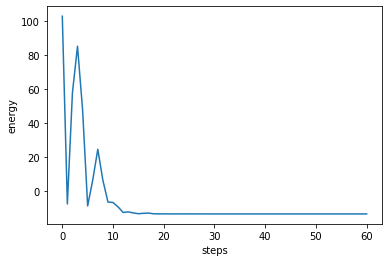

In [78]:
plt.plot(eval(result.meta_data["optimization_trace"]))
plt.xlabel("steps")
plt.ylabel("energy")
plt.show()

In [79]:
import itertools
def exact_cover_obj(result, U, V):
    solution = [Vi for i, Vi in enumerate(V) if result[i] == '1']
    for i in itertools.combinations(solution, 2):
        if len(i[0].intersection(i[1])) != 0:
            return np.inf
    cover = set().union(*solution)
    difference = set(U) - cover
    if len(difference) == 0:
        return len(solution)
    else:
        return np.inf

In [93]:
# Emulating a reasonnable setup:
# Drawing 1024 cuts
sol_job = job(**eval(result.meta_data["parameter_map"]))
sampling_job = sol_job.circuit.to_job(nbshots=1024)
sol_res = qpu.submit(sampling_job)

max_state = max([(s.state.value[0], s.probability) for s in sol_res], key=lambda s: s[1])
print("State with highest probability"
      , max_state[0]
      , "%.2f%%" % (100 * max_state[1])
      , [Vi for i, Vi in enumerate(V) if max_state[0][i] == '1'] )

tuple_list = [(s.state.value[0], s.probability, exact_cover_obj(s.state.value[0],U,V)) for s in sol_res]
exact_cover = min(tuple_list, key=lambda s: s[2])[0]
print(
    "Exact Cover:"
    , exact_cover
    , "%.2f%%" % (100 * max_state[1])
    , [Vi for i, Vi in enumerate(V) if exact_cover[i] == '1']
)

State with highest probability 1001010 4.98% [{1, 7}, {4, 5, 7}, {2, 3, 6}]
Exact Cover: 0010101 4.98% [{1, 4}, {3, 5, 6}, {2, 7}]
